# Angular extent of the terminator, $\tau$

In this notebook, we validate our expression for the angular extent of the terminator, $\tau$. This is how far the day/night terminator extends past $\frac{\pi}{2}$ past the sub-stellar point in the case that the star has a nonzero angular size as seen from the planet.

In [1]:
%matplotlib inline

In [2]:
%run notebook_setup.py

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Arc

Here's the expression we presented in the paper, where `Rp` is the planet radius, `Rs` is the stellar radius, and `a` is the semi-major axis (assuming a circular orbit):

In [4]:
def tau(Rp, Rs, a):
    """The angular extent of the terminator past pi/2."""
    return np.arcsin((1.0 - Rp / Rs) / (a / Rs))

Let's define a function that draws the geometry of a star-planet system:

In [5]:
def draw(Rp, Rs, a):
    fig, ax = plt.subplots(1, figsize=(8, 12))

    # Star
    ax.add_artist(plt.Circle((0, 0), Rs, fc="none", ec="k"))

    # Planet
    ax.add_artist(plt.Circle((0, a), Rp, fc="#FFFF97", ec="none", zorder=-1))
    ax.add_artist(plt.Circle((0, a), Rp, fc="none", ec="k"))

    # Misc points and lines
    ax.plot(0, 0, "ko", ms=2, zorder=99)
    ax.plot(0, a, "ko", ms=2, zorder=99)
    ax.plot([0, 0], [0, a], "k--", lw=1, alpha=0.5)
    ax.plot([0, Rs], [0, 0], "k--", lw=1, alpha=0.5)
    ax.plot([0, Rp], [a, a], "k--", lw=1, alpha=0.5)

    # Get the angle tau and the corresponding (x, y)
    # point on the unit disk.
    xtau = np.cos(tau(Rp, Rs, a))
    ytau = np.sin(tau(Rp, Rs, a))

    # Mark the angle on both the star and the planet
    ax.plot([0, Rs * xtau], [0, Rs * ytau], "k-", lw=1)
    ax.add_artist(Arc((0, 0), Rs, Rs, theta1=0, theta2=tau(Rp, Rs, a) * 180 / np.pi))
    ax.annotate(
        r"$\tau$",
        xy=(0.5 * Rs * np.cos(0.5 * tau(Rp, Rs, a)), 0.5 * Rs * np.sin(0.5 * tau(Rp, Rs, a))),
        xycoords="data",
        xytext=(10 * np.cos(0.5 * tau(Rp, Rs, a)), 10 * np.sin(0.5 * tau(Rp, Rs, a))),
        textcoords="offset points",
        fontsize=12,
        ha="center",
        va="center",
    )
    ax.plot([0, Rp * xtau], [a, a + Rp * ytau], "k-", lw=1)
    ax.add_artist(Arc((0, a), Rp, Rp, theta1=0, theta2=tau(Rp, Rs, a) * 180 / np.pi))
    ax.annotate(
        r"$\tau$",
        xy=(0.5 * Rp * np.cos(0.5 * tau(Rp, Rs, a)), a + 0.5 * Rp * np.sin(0.5 * tau(Rp, Rs, a))),
        xycoords="data",
        xytext=(10 * np.cos(0.5 * tau(Rp, Rs, a)), 10 * np.sin(0.5 * tau(Rp, Rs, a))),
        textcoords="offset points",
        fontsize=12,
        ha="center",
        va="center",
    )

    # This is the tangent line to both the planet and the star
    ax.plot([Rs * xtau, Rp * xtau], [Rs * ytau, a + Rp * ytau], "r--", lw=1)

    # Shade the night side
    x = np.linspace(-Rp * xtau, Rp * xtau, 1000)
    ax.fill_between(x, a + Rp * ytau, a + np.sqrt(Rp ** 2 - x ** 2), fc="w", ec="k")

    # Shade the portion of the star visible from the planet
    x = np.linspace(-Rs * xtau, Rs * xtau, 1000)
    ax.fill_between(
        x, Rs * ytau, np.sqrt(Rs ** 2 - x ** 2), fc="#FFFF97", ec="k",
    )

    # Adjust limits
    ax.set_xlim(-1.5 * Rs, 1.5 * Rs)
    ax.set_ylim(-1.1 * Rs, 1.1 * (a + Rp))
    ax.set_aspect(1)
    ax.axis("off")

We consider a case where the planet is quite large and *extremely* close to its star:

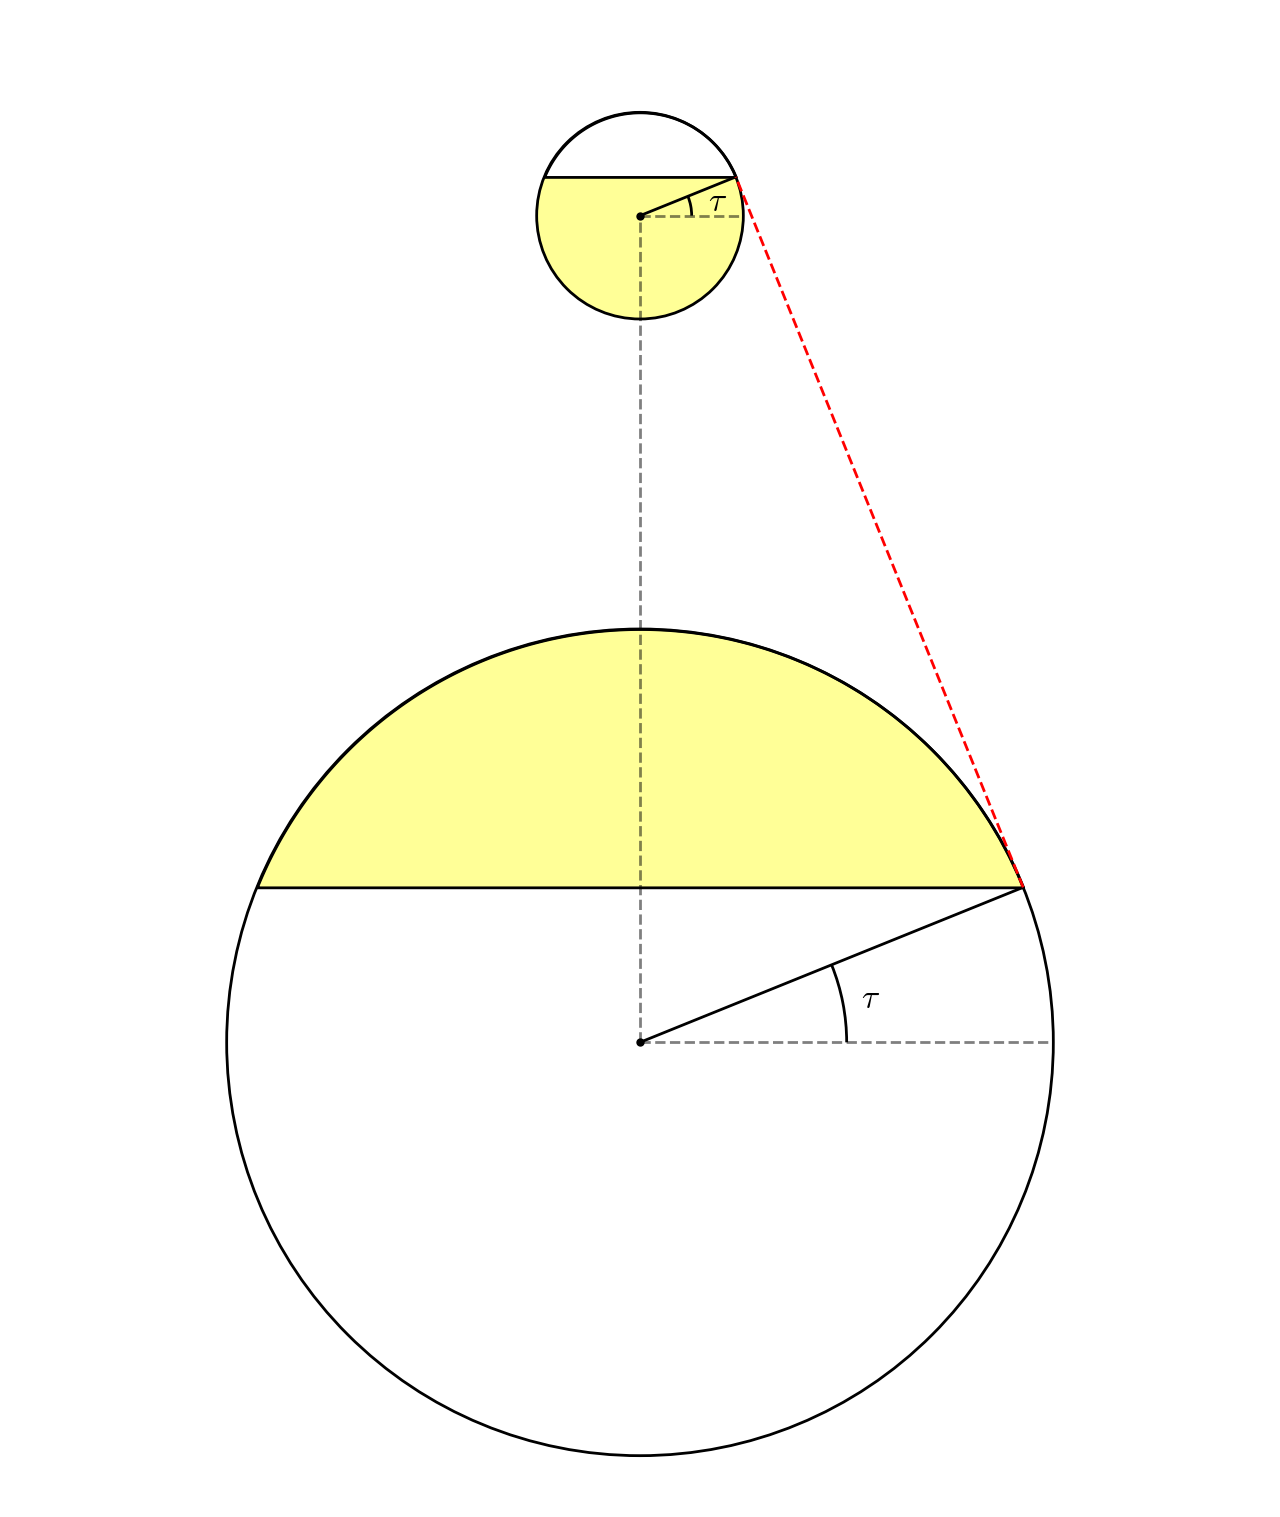

In [6]:
Rp = 0.25
Rs = 1
a = 2
draw(Rp, Rs, a)

The star is the large circle at the bottom, and the planet is the smaller one at the top. The dashed red line is the line that is tangential to *both* the limb of the star and the limb of the planet. The point it touches on the limb of the planet is the point that's farthest from the star while still being illuminated by *some* portion of the star. Beyond this point, there exist no rays from anywhere on the star reaching the surface of the planet. This point is therefore on the day/night terminator, whose angular extent past the midplane of the planet is the angle we call $\tau$.

In yellow we indicate the region of the planet that is illuminated by the star---note that in this case it's significantly more than one-half its surface. We also shade the region of the *star* participating in the illumination. Because the planet is so close, less than half of the surface of the star is visible from the planet's surface.